# Phénologie dans les Pyrénées : étude de la pollinisation par les bourdons sauvages

## Introduction

Ce projet porte sur la phénologie, c'est-à-dire l'étude des événements biologiques saisonniers dans le monde animal et végétal. Cela concerne le dépliement des feuilles et la pollinisation des plantes au printemps ou en été; la maturation des fruits, le changement de couleur et la chute des feuilles en automne, ainsi que l'apparition et le départ des oiseaux migrateurs et le moment de l'élevage des animaux.

Dans notre cas, on s'intéresse à la pollinisation de plantes sauvages par des bourdons (*bumblebees an anglais*) dans les Pyrénées.

Contrairement au TP précédent, celui-ci sera bien moins guidé. Si vous souhaitez trouver de l'aide, n'hésitez pas à lire le papier scientifique sur lequel ce projet ce base : [Bumblebees moving up: shifts inelevation ranges in the Pyreneesover 115 years.](http://dx.doi.org/10.1098/rspb.2020.2201) par Léon Marshall *et al.* Proc. R. Soc. B (2020)


Les données pour ce projet sont réelles. Les conclusions que vous en tirerez également.

<span style="color:green">


    
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
    --------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------


In [52]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

%matplotlib inline

## Contexte

Les températures à l'échelle mondiale augmentent depuis plusieurs décennies en particulier aux altitudes et latitudes élevées. Cette augmentation a un impact sur la répartition spatiale de la biodiversité, poussant souvent les espèces vers des altitudes et des latitudes plus élevées afin de vivre à  des températures similaires à leur habitat d'autrefois. Cela peut entraîner la disparition de certaines espèces qui habitaient auparavant dans les zones les plus froides car les conditions climatiques favorables n'existent plus ou alors des espèces invasives entrent en compétition et accaparent les ressources.
Lorsque plusieurs espèces sont en interaction, la réponse au changement climatique est encore plus compliquée puisque ces espèces peuvent réagir différemment au réchauffement climatique ou peuvent ne pas avoir la meme capacité de dispersion. Les différences dans la direction ou la vitesse des changements d'aire de répartition pourraient entraîner des décalages phénologiques ou spatiaux dans les relations plantes-pollinisateurs.

Dans ce TP, nous nous intéressons aux changements possible de pollinisation de plantes sauvages par les bourdons dans les Pyrénées qui auraient eu lieu entre 1889 et 2006. Les communautés de bourdons et de plantes ont-elle changé de composition et/ou d'altitude à cause du changement climatique ? Les bourdons pollinisent-ils toujours les mêmes plantes ?

### Bourdons

Les bourdons font partie des principaux pollinisateurs de plantes au même titre que les abeilles. 

<img src=https://upload.wikimedia.org/wikipedia/commons/1/15/Bombus_September_2007-2.jpg width=200/> 
<img src=https://upload.wikimedia.org/wikipedia/commons/8/8f/Bombus_hypnorum_male_-_side_%28aka%29.jpg width=150>

Grâce à leur fourrure isolante, ils ont la particularité de polliniser des plantes dans les environnements les plus froids (en altitude ou en fin de saison) et on les rencontre normalement dans les régions tempérées mais aussi dans les régions plus fraîches que celles très fréquentées par les abeilles.

### Zone étudiée   

Ce TP étudie des données de la commune de Gavarnie-Gèdre dans le département des Hautes-Pyrénées en France, située à côté de la frontière avec l'Espagne. La zone étudiée fait partie du Parc National des Pyrénées (etabli depuis 1967) situé dans la partie ouest des Pyrénées. 

Le parc national est situé entre 1000m et son sommet, 3298m, le Pic Vignemale. La région abrite une flore et une faune vastes et diversifiées avec de nombreuses espèces endémiques (restreinte à cet emplacement géographique). Bien que protégée, elle abrite aussi des habitations et des terres agricoles. Les habitations sont généralement à des altitudes plus basses et les zones agricoles plus haut à flanc de montagne, jusqu'à 2000m. 

<img src=https://www.tourisme-hautes-pyrenees.com/var/ezflow_site/storage/images/media/images/grands-sites/gavarnie/cirque-de-gavarnie2/23250-5-fre-FR/Cirque-de-Gavarnie_format_603x400.jpg width=600>

De manière générale, la végétation de la région correspond à des prairies de fauche et une forêt de pins, avec une ligne d'arbres autour de 2000m d'altitude (altitude maximale des arbres). La région a des climats océaniques et montagnards avec une température annuelle moyenne d'environ 6,5°C et des précipitations annuelles moyennes de 1049mm.


### Le jeu de données

Nous avons accès à deux collections d'échantillons séparés de 115 ans. 

Entre le 5 et le 31 août 1889, le biologiste et naturaliste Prof. Julius MacLeod, a échantillonné les plantes et les communautés de visiteurs des plantes, à sept endroits de la région compris entre 1000 et 2800m d'altitude, avec des visiteurs des plantes enregistrés jusqu'à 2100m d'altitude. Il a publié un récit des plantes et des visiteurs des plantes qu'il a observés en 1891 dans "De pyreneënbloemen". L'objectif de cette enquete était de comparer la communauté florale le long des gradients d'habitat et d'altitude dans les Pyrénées. Néanmoins, MacLeod a collecté et identifié tous les insectes visiteurs observés lors de l'étude de la communauté végétale. MacLeod a étudié 263 espèces de plantes distinctes avec 569 visiteurs d'insectes distincts. Les bourdons collectés par MacLeod ont été identifiés par le professeur Otto Schmiedeknecht.

<img src=https://royalsocietypublishing.org/cms/asset/4f7f9ca3-1258-40d4-89c3-4529eff166ac/rspb20202201f01.jpg width=600>

En août 2005 et août 2006, de nouveaux échantillons ont été collectés en cherchant à rendre les études de 1889 et celle de 2005-2006 aussi comparables que possible en termes de plantes visitées, de lieux et d'altitudes. La cible est de comparer les visiteurs des plantes et pour cela il a fallu trouver une correspondance avec le lieu et les espèces végétales observées par MacLeod. Si cela n'était pas possible, un autre emplacement proche à une altitude similaire avec la même espèce végétale observée par MacLeod a été recherché. De plus, des visiteurs d'autres plantes à fleurs aux emplacements d'origine de MacLeod ont été observés et enfin, d'autres espèces de plantes à fleurs ont été observées à des emplacements correspondant en altitude, mais différents des emplacements MacLeod.


Les localisations des échantillons sont visibles sur la figure ci-dessus.


### A quoi correspond l'échantillonnage ?

Ce paragraphe permet de vous rendre compte de la quantité de travail nécessaire pour obtenir ce type de données.

Pour chaque lieu, une parcelle a été observée pendant 15 min. La taille de la parcelle a été déterminée comme la plus grande surface d'une parcelle de fleurs sur laquelle tous les visiteurs pouvaient être observés (de quelques mètres carrés à une dizaine de mètres carrés selon la croissance et la floraison des espèces végétales). Au cours des 15 minutes, tous les bourdons visiteurs ont été capturés puis identifiés par des experts, excepté pour *B. gerstaeckeriqui* qui a été identifié à vue car il est reconnaissable sur le terrain et rare. La surface de chaque parcelle a été mesurée et sa densité de fleurs a été enregistrée. L'altitude et les coordonnées GPS (WGS 84) de chaque parcelle ont également été enregistrées.

*Ceci étant dit, passons à l'analyse des données !*
 


#  <mark style='background-color: #B0E0E6'> Analyse du climat </mark>

Dans quelle mesure y a-t-il eu un changement climatique dans les Pyrénées ? 

Vous avez accès au fichier [Regional_Trend_Temps.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv") à l'adresse https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/.span 

Pour chaque parcelle (`Grid-ID`) on connait ses coordonnées (`Latitude` et `Longitude`), son altitude (`Elevation`) et la température moyenne (`AnnualMeanTemp`), minimale (`Avg_min`) ou maximale (`Avg_max`) pour chaque année (`Year`).

<mark style='background-color: yellow'>Chargez-le dans un objet appelé climat_an</mark> . ✅ 

<span style="color:green">

---> Dans un prmier temps, dans la cellule suivante nous chargons le jeu de donnée dans un objet appler
    
---> Puis avec .head nous appelons les 10 première ligne du jeu de donnée 

In [53]:
climat_an = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv")
climat_an.head(11)

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_min,Avg_max
0,1901,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1,1901,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
2,1901,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
3,1901,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
4,1901,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667
5,1901,6,42.776255,0.018410,1224.591309,5.741667,10.325000,1.141667
6,1901,7,42.812012,0.012367,1237.768555,5.691667,10.425000,0.933333
7,1901,8,42.766120,0.007818,1298.861084,5.333333,9.866667,0.800000
8,1901,9,42.775059,0.006307,1306.922119,5.300000,9.883333,0.733333
9,1901,10,42.677146,0.079928,1309.457764,5.333333,9.708333,0.925000


<mark style='background-color: yellow'> - Quelle est la dimension de la table ?</mark> ✅

<span style="color:green">
---> En utilisant la méthode .shape nous obtenons un tuple contenant le nombre de lignes et le nombre de colonnes de la table. 
    
---> Ici on voit que nous avont donc 19 293 ligne et 8 colonnes, c'est donc sa la dimention de la table  

In [54]:
climat_an.shape

(19293, 8)

<mark style='background-color: yellow'> - Combien y a-t-il de parcelles ?</mark> ✅


<span style="color:green">
---> Si on regarde bien le tableau on voit bien que la colonne Grid-ID représente chaque parcelle, or chaque parcelle represente une ligne, on peut 
    
---> directement conclure que il ya 19 293 parcelle (cf question precédente)   

<mark style='background-color: yellow'> - Quelle est la température moyenne des mesures de température moyenne, minimale et maximale ?</mark> ✅


<span style="color:green">
    
---> Nous avons utiliser la méthode .mean afin d'avoir la moyen des données d'une colonne, par la suite nous l'avons chager dans l'objet moyenne_Temp
    
---> Avec le même raisonement on utilisera les methodes .min et .max pour avoir le maximum et le minimum des Températures  

---> On Obtient donc une moyenne des temperatures moyenne de : 3.928845954492303
    
---> On Obtient donc le maximum  des temperatures moyenne de : -0.12878159608666362
    
---> On Obtient donc le minimum  des temperatures moyenne de : 7.986246738889338



In [55]:
moyenne_Temp = climat_an['AnnualMeanTemp'].mean()
moyen_max_Temp = climat_an['Avg_max'].mean()
moyen_min_Temp = climat_an['Avg_min'].mean()

print("Moyenne : ",moyenne_Temp)
print("Maximum : ",moyen_max_Temp)
print("Minimum : ",moyen_min_Temp)

Moyenne :  3.928845954492303
Maximum :  -0.12878159608666362
Minimum :  7.986246738889338


<mark style='background-color: yellow'> - Il y a une chose bizarre ?</mark> ✅


<span style="color:green">

---> Effectivement nous remarquons quelque chose d'étrange, nos résultats montre un Minimum plus grand que notre Maximum, nous remarquons

---> égalment que dans notre tableau les tendances nous porte à croire que les collone on été inversé     


<mark style='background-color: yellow'> - Corrigez la table</mark> ✅


<span style="color:green">

---> Nous allons procéder comme suite, à l'aide la méthode .rename nous allons pouvoir inversé les deux collone conserné 
    
---> Puis par la suite afficher les 10 première linge du tableau pour verifié si les mofification on été prise en compte 
    
---> Par la suite nous afficherons égallement la réponce à la question avec les bonne réponce   

In [56]:
climat_an = climat_an.rename(columns={'Avg_min': 'Avg_max', 'Avg_max': 'Avg_min'})
climat_an.head(11)

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_max,Avg_min
0,1901,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1,1901,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
2,1901,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
3,1901,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
4,1901,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667
5,1901,6,42.776255,0.018410,1224.591309,5.741667,10.325000,1.141667
6,1901,7,42.812012,0.012367,1237.768555,5.691667,10.425000,0.933333
7,1901,8,42.766120,0.007818,1298.861084,5.333333,9.866667,0.800000
8,1901,9,42.775059,0.006307,1306.922119,5.300000,9.883333,0.733333
9,1901,10,42.677146,0.079928,1309.457764,5.333333,9.708333,0.925000


In [57]:
moyenne_Temp = climat_an['AnnualMeanTemp'].mean()
moyen_max_Temp = climat_an['Avg_max'].mean()
moyen_min_Temp = climat_an['Avg_min'].mean()

print("Moyenne : ",moyenne_Temp)
print("Maximum : ",moyen_max_Temp)
print("Minimum : ",moyen_min_Temp)

Moyenne :  3.928845954492303
Maximum :  7.986246738889338
Minimum :  -0.12878159608666362


<mark style='background-color: yellow'> - Décrivez le reste de la table.</mark> ✅

<span style="color:green">
    
---> Pour décrire le reste du tableau, nous allons utiliser la méthode .describe qui nous permet d'avoir une vue d'ensemble sur la table  
    
---> Dans un second temps nous illustrerons cela sur un graphe pour avoir une idée géneral 


In [58]:
climat_an.describe()

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_max,Avg_min
count,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000
mean,1955.000000,9647.000000,42.759605,0.011590,1817.391468,3.928846,7.986247,-0.128782
std,31.465081,5569.553707,0.041885,0.054499,282.084808,1.668738,1.841116,1.536841
min,1901.000000,1.000000,42.666244,-0.107958,1024.201416,0.350000,3.816667,-3.991667
25%,1928.000000,4824.000000,42.729166,-0.025479,1633.574097,2.666667,6.600000,-1.283333
50%,1955.000000,9647.000000,42.756579,0.009329,1870.565918,3.683333,7.708333,-0.316667
75%,1982.000000,14470.000000,42.790540,0.053217,2032.326050,5.041667,9.200000,0.900000
max,2009.000000,19293.000000,42.838897,0.113607,2190.243164,9.866667,14.400000,5.366667


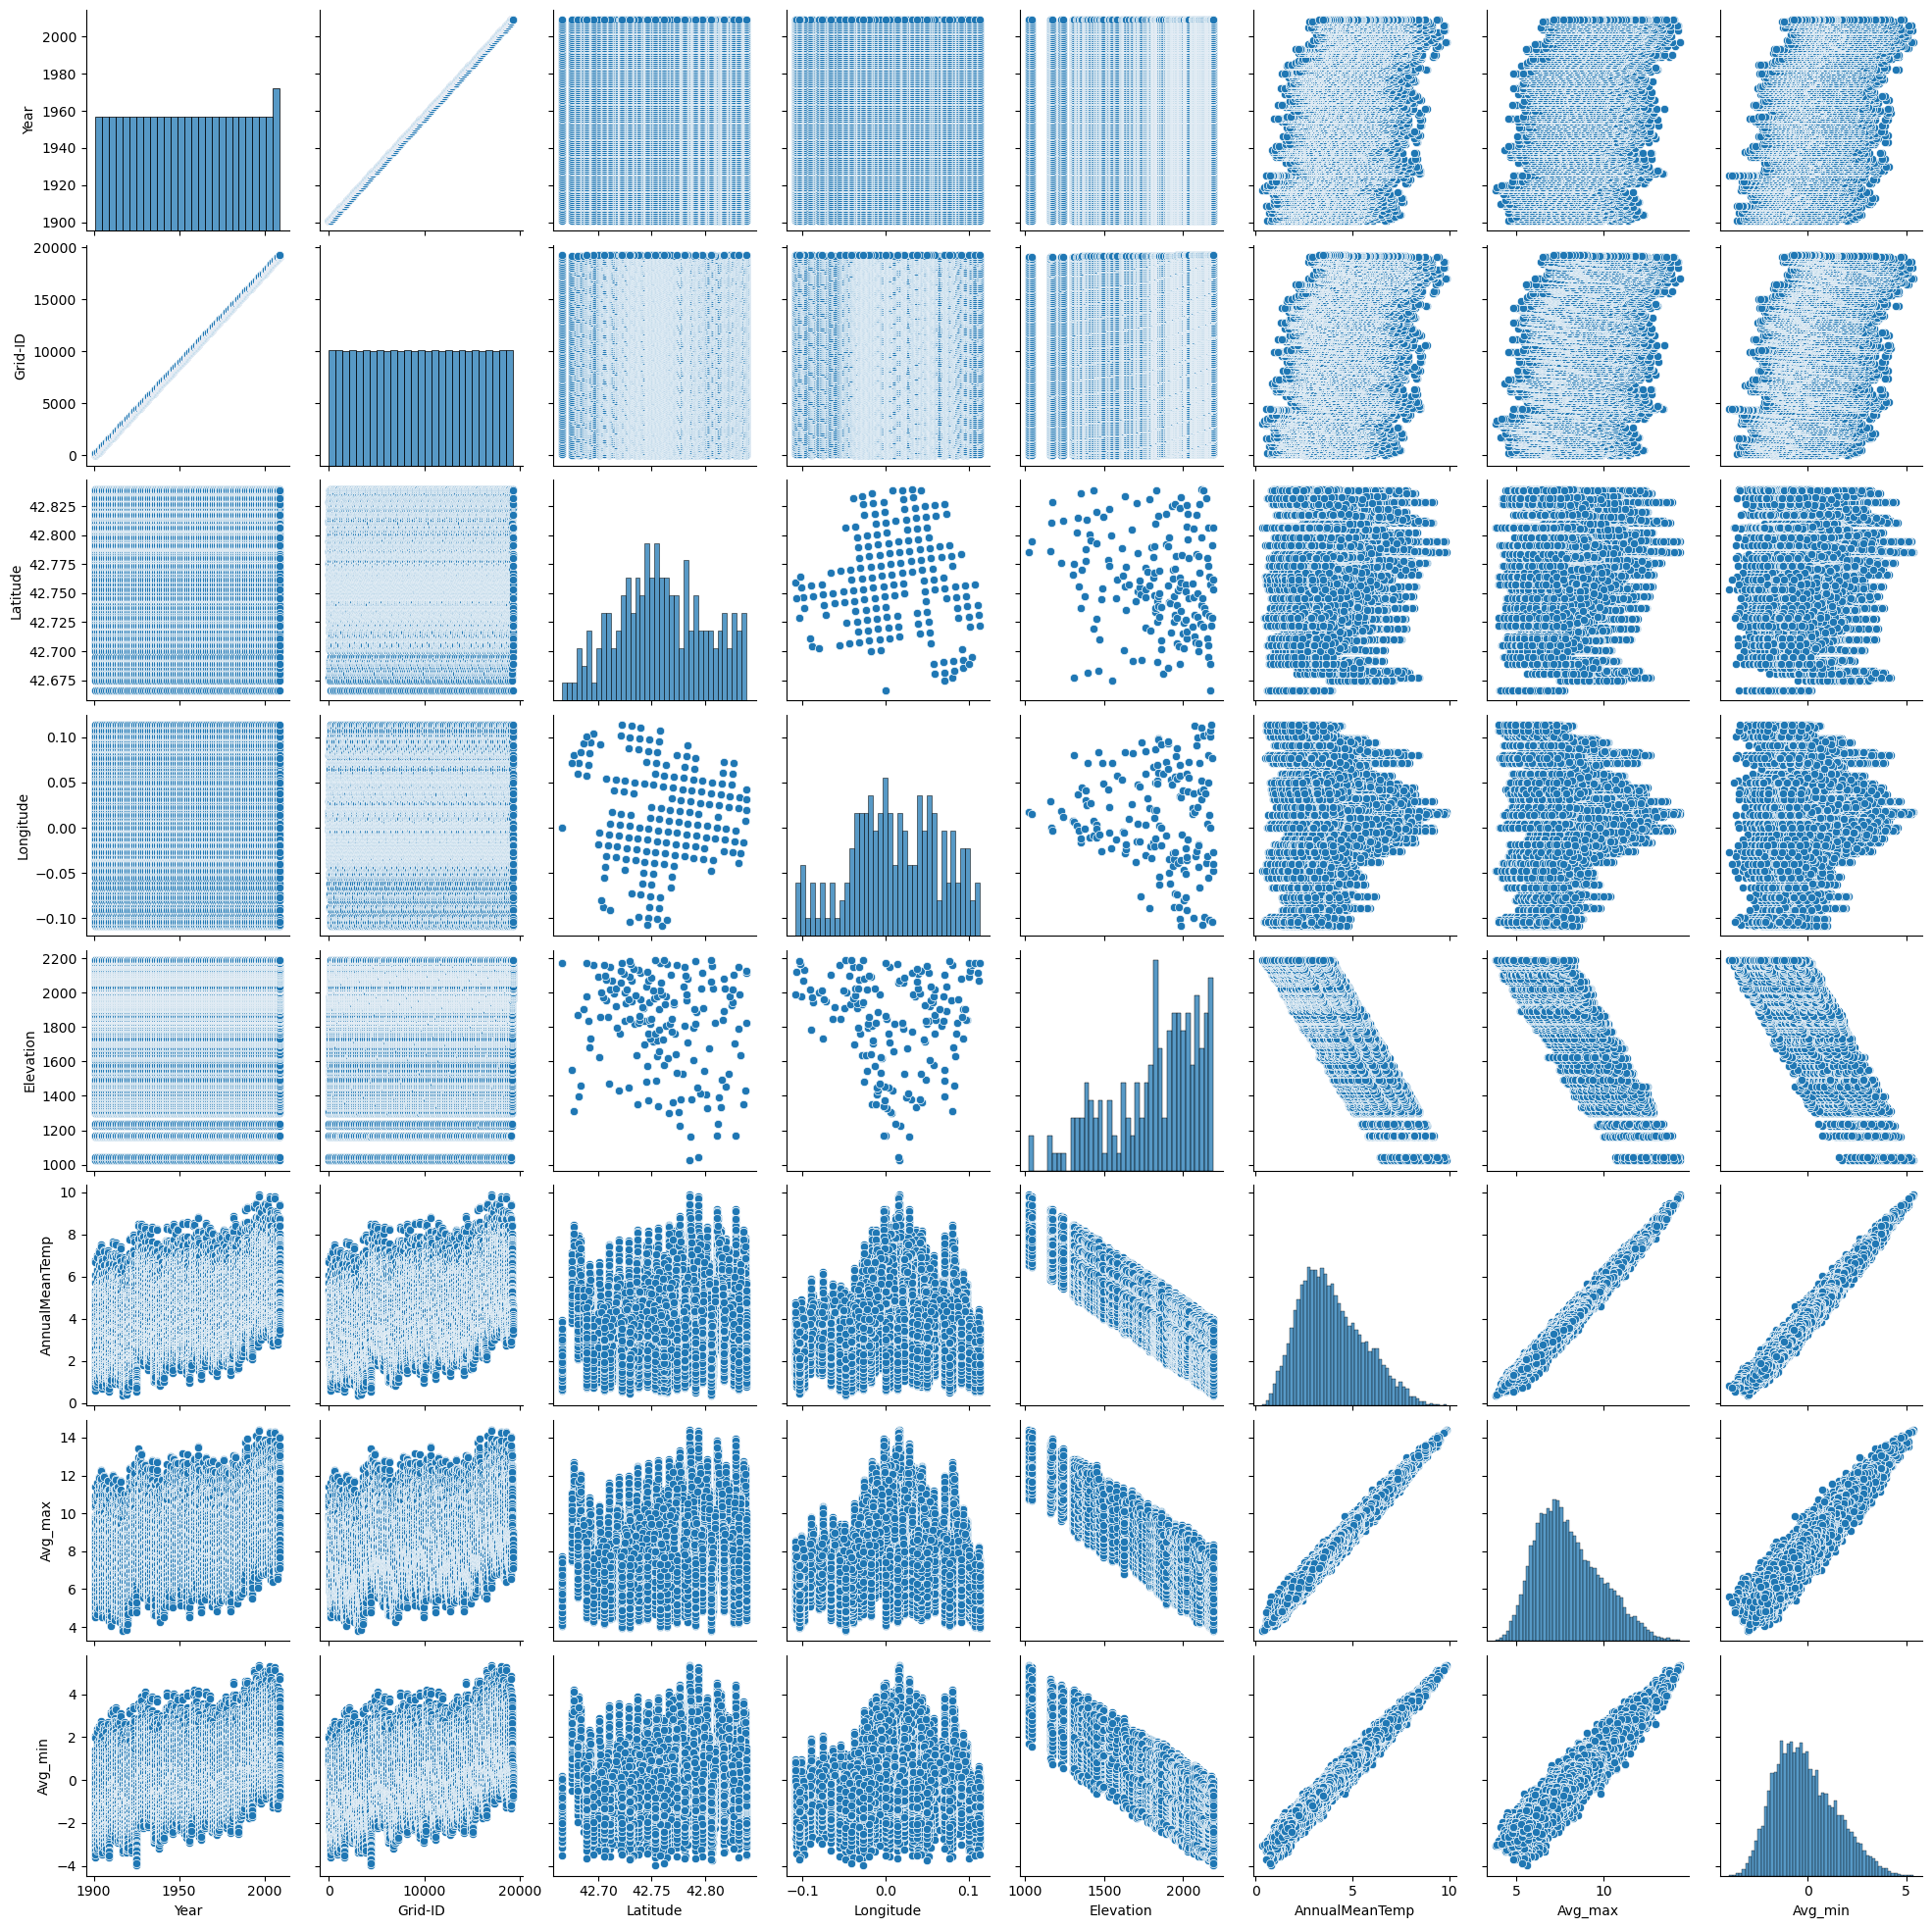

In [59]:
sns.pairplot(climat_an)

<span style="color:green">
---> Nous avons la beaucoups de graphe mais nous allons seulement nous concentrer sur la premiere colone de graphe qui annalyse toute les
    
---> caracteristique  par apport au temps, ce qui nous donne une vue globale sur se qui varie et ce qui ne varie pas 

<mark style='background-color: yellow'> - A partir de cette table uniquement, Comment évolue la température dans les Pyénées au 20eme siècle (faites une figure) ?</mark> ✅

<span style="color:green">
---> Nous Souhaitons donc avoir un graphique qui représente la temperature au 20eme siècle 
    
---> Pour cela, et afin d'évité les erreurs du au index, nous allons la supprimer et la remplacer par la colonne Year
    
---> Nous remarquons donc garce au graphique ci-dessous que la température a évoluer en augmentant de facons progressife de 1900 à 2000 

In [60]:
climat_an1 = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv", index_col = 'Year', parse_dates = True)
climat_an1.head()

,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_min,Avg_max
Year,,,,,,,
1901-01-01,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1901-01-01,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
1901-01-01,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
1901-01-01,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
1901-01-01,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667


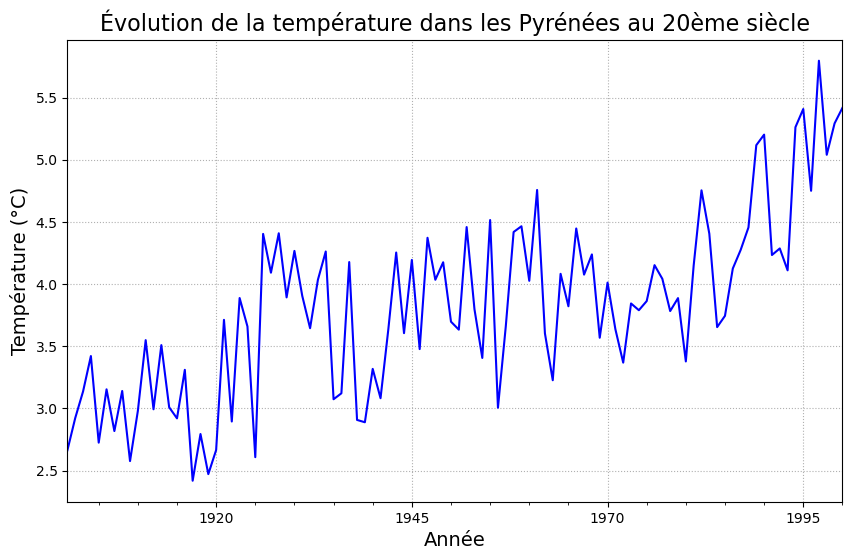

In [61]:
# Ici on defiie la taille du graphique 
plt.figure(figsize=(10,6))

# Ici on choisie notre intervalle de temps 
climat_an1['1901':'2000']['AnnualMeanTemp'].resample('Y').mean().plot(color='blue', linestyle='solid')

# Ici on donne les titre et les axes 
plt.title('Évolution de la température dans les Pyrénées au 20ème siècle', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Température (°C)', fontsize=14)

# Ici on ajoute une grille de fond en pointillés
plt.grid(linestyle='dotted')

# Ici on afficher le graphe
plt.show()


<mark style='background-color: yellow'> - Quel est le changement moyen de température par décennie</mark> ✅

<span style="color:green">
---> Nous utiliserons le même garphe que précédament en changant le Y en 10 Y  
    
---> De cette facons nous avons une courbe qui nous indique le changement moyen de température par décennie

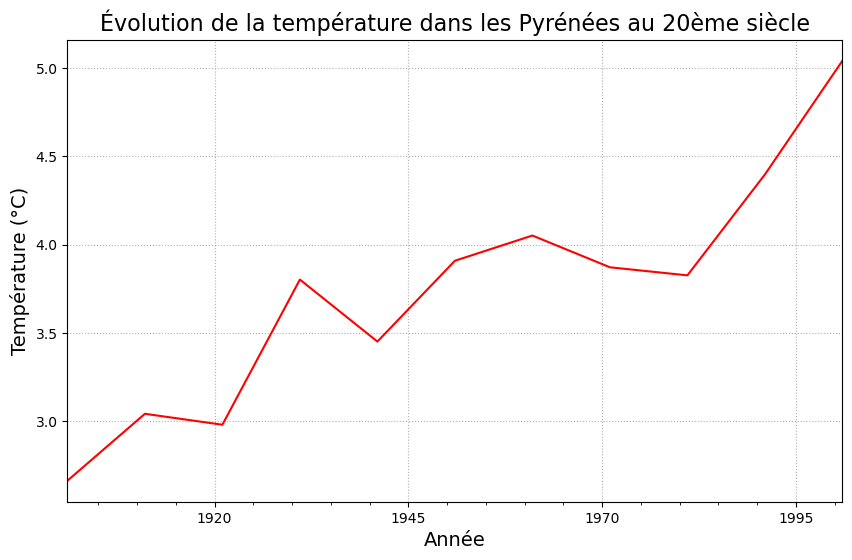

In [62]:
# Ici on defiie la taille du graphique 
plt.figure(figsize=(10,6))

# Ici on choisie notre intervalle de temps 
climat_an1['1901':'2000']['AnnualMeanTemp'].resample('10Y').mean().plot(color='red', linestyle='solid')

# Ici on donne les titre et les axes 
plt.title('Évolution de la température dans les Pyrénées au 20ème siècle', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Température (°C)', fontsize=14)

# Ici on ajoute une grille de fond en pointillés
plt.grid(linestyle='dotted')

# Ici on afficher le graphe
plt.show()


<mark style='background-color: yellow'> - Avec cette estimation, Quelle température attend-on en 2050 ?</mark> ✅

<span style="color:green">
---> Pour avoir une éstimation des température pour 2050 il sera nécessaire de faire une régression linéaire
    
---> Voici ci-dessous le graphique qui nous permet de voir que pour 2050 on pourais s'attendre à des températures avoisinant les 5 degrés Celsius 
    
---> garce à la méthode trend nous avont pus obtenir la temperature exacte pour 2050 qui est de 5.79°C

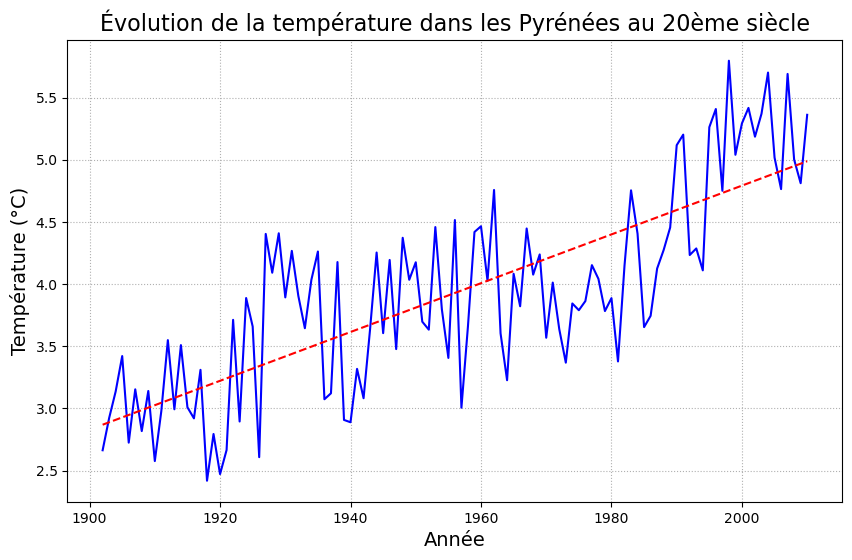

In [63]:
import numpy as np

plt.figure(figsize=(10,6))

# Ici on choisie notre intervalle de temps 
temp_an = climat_an1['1901':'2050']['AnnualMeanTemp'].resample('Y').mean()

# Ici on donne les titre et les axes 
plt.title('Évolution de la température dans les Pyrénées au 20ème siècle', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Température (°C)', fontsize=14)

# Ici on ajoute une grille de fond en pointillés
plt.grid(linestyle='dotted')

# Ici on affiche les données
plt.plot(temp_an.index, temp_an, color='blue', linestyle='solid')

# Ici on calcule la régression linéaire
coeffs = np.polyfit(temp_an.index.year, temp_an, deg=1)
trend = np.poly1d(coeffs)
plt.plot(temp_an.index, trend(temp_an.index.year), color='red', linestyle='dashed')

# Ici on afficher le graphe
plt.show()

In [64]:
print("Coefficient directeur de la régression linéaire :", 10*coeffs[0])

Coefficient directeur de la régression linéaire : 0.19623921535406916


In [65]:
temperature_predite = trend(2050)
print(f"La température prédite pour l'année 2050 est de {temperature_predite:.2f}°C")

La température prédite pour l'année 2050 est de 5.79°C


###  <mark style='background-color: #B0E0E6'> Utilisation des sols </mark>

Nous allons travailler sur le fichier [Regional_LandUse.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv") disponible sur la même page internet que précedemment. Chargez le dans un objet appelé `landUse`.

Pour chaque parcelle (`Grid_ID`), on a sa zone d'élevation (`EleZone`) qui correspond à de la moyenne montagne, une zone subalpine ou alpine (*z1, z2, z3 respectivement*) ainsi que son altitude moyenne (`Avg_Ele`). Ensuite, on connait aussi l'utilisation de ces sols pour chaque décennie (`LUn` où *n* est la décennie). Le code est le suivant 333 = Forêt, 444 = Prairie et 555 = Autres (neige ou sol caillouteux).


Pour chaque zone d'élevation, l'utilisation des sols a-t-elle changée au cours du XXe siècle ? Faites au moins une figure.

<mark style='background-color: yellow'> - Pour chaque zone d'élevation, l'utilisation des sols a-t-elle changée au cours du XXe siècle ? Faites au moins une figure.</mark> ✅

<span style="color:green">
---> Réponse : d'après les figures que nous avons générer, l'utilisation des sols a bien changer. En effet en moyene montage on peut voir qu'il ya de plus en plus de foret et de moins en moins de prairies et de même on peut voir grace on 3ème graphique que les zones alpines on tendence a avoir beacoups de foret et de zonne de neige et tres peut de prairies 
    


<span style="color:green">
    
---> On voit bien grace à ses graphique que les sole change car normallement il ya que de la neige en zonne Alpine or ici on vois qu'il ya de plus en plus de foret. Le même processuse est vérifiable pour la zonne 1 ou on peut pancé que cela est du au changement de temperature surment   

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier csv dans un DataFrame
landUse = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv")
landUse

,Grid_ID,Avg_Ele,LU1910,LU1920,LU1930,LU1940,LU1950,LU1960,LU1970,LU1980,LU1990,LU2000,LU2010,EleZone
0,1,2188.501217,555,555,555,555,555,555,555,555,555,555,555,z3
1,2,1632.670093,444,333,333,333,333,333,333,444,444,444,444,z2
2,3,1343.865375,444,444,333,333,333,333,333,333,333,333,333,z1
3,4,2079.838211,444,333,333,333,333,333,444,444,444,444,444,z3
4,5,1687.210676,444,333,333,333,333,333,333,333,333,333,333,z2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,1149.671557,333,333,333,333,333,333,333,444,444,444,333,z1
194,195,1105.090375,444,444,444,333,333,333,333,333,333,333,333,z1
195,196,1659.027538,444,444,444,444,444,444,444,444,444,444,444,z2
196,197,1935.399996,444,444,444,444,444,444,444,444,444,444,444,z3


In [67]:
def fctheat(df, zone):
    dfbis = df[df['EleZone'] == zone]
    col = [f"LU{lu}" for lu in np.arange(1910, 2020, 10)]
    val = []
    for lu in col:
        val.append(dfbis.groupby(lu)[lu].count().values)
    
    dfheat = pd.DataFrame(val, columns=[333, 444, 555], index=col)
    sns.heatmap(dfheat, annot=True, cmap="YlGnBu")
    plt.title(f"Utilisation des sols sur {zone}")
    plt.xlabel("sols")
    plt.ylabel("décennie")
    plt.show()

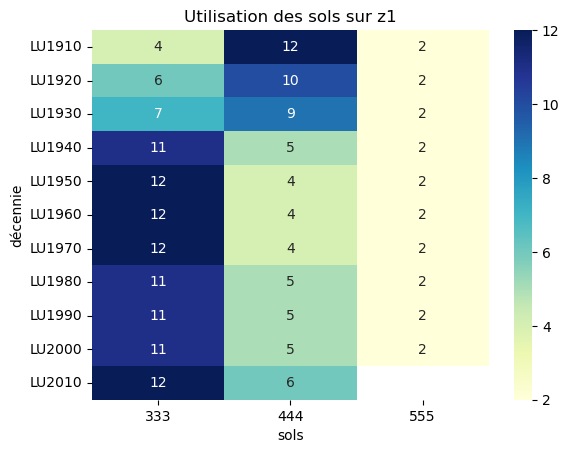

In [68]:
fctheat(landUse,"z1")

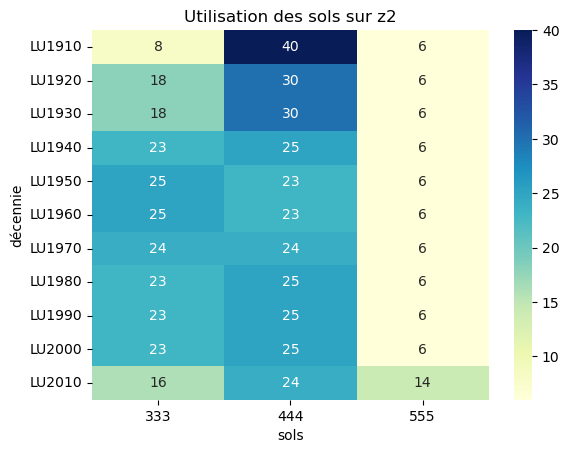

In [69]:
fctheat(landUse,"z2")

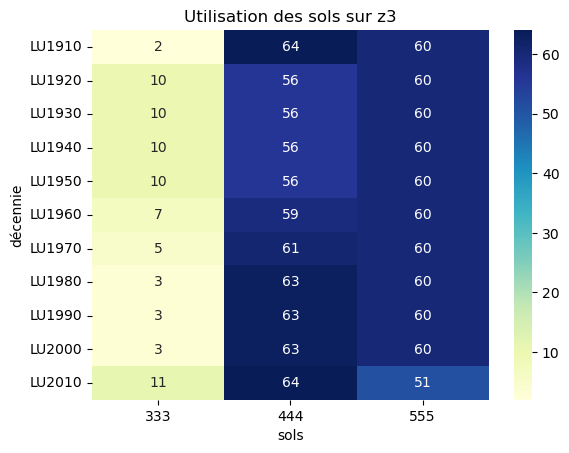

In [70]:
fctheat(landUse,"z3")

<span style="color:green">
---> Pour conclure 
    
    
Les figures montrent que la forêt a gagné en surface dans la moyenne montagne et la zone subalpine, dépassant les prairies. La zone alpine est stable avec des prairies, neiges et zones caillouteuses. L'agriculture a peut-être été abandonnée dans ces zones, en raison de la déforestation ou d'autres facteurs. Les agriculteurs pourraient se tourner vers de nouveaux endroits en haute montagne en raison du changement climatique. Les conséquences sur la biodiversité restent à explorer.

### <mark style='background-color: #B0E0E6'> Richesse de la biodiversité </mark> 

Avant de continuer notre analyse sur la biodiversité, on va évaluer la qualité d'échantillonnage des parcelles. On s'intéresse donc à la *quantité* de biodiversité échantillonnée au XIXe et au XXe. A partir de ces estimations on va pouvoir répondre à la question suivante: est-ce que la richesse de biodiversité a évolué au XXe siècle?

MacLeod et l'équipe de 2005-2006 n'ont pas fourni les mêmes efforts d'échantillonnage. Avec les moyens techniques récents, il est plus facile d'observer la biodiversité. Afin de comparer les 2 expériences, il faut comparer la quantité d'espèces observées *étant donné l'effort d'échantillonnage*. En effet, en écologie une difficulté est d'estimer ce que signifie biodiversité. Dit autrement, si vous n'échantillonnez qu'un seul individu, vous n'aurez qu'une seule espèce présente dans votre parcelle alors que si vous échantillonnez 100,000 individus (comprendre, un individu = un insecte et, une espèce comporte plusieurs individus) alors vous aurez probablement échantillonné toutes les espèces présentes sur votre parcelle. Est-ce que l'observation de 15min d'une parcelle est suffisante pour ce faire une idée de la biodiversité ?

Pour répondre à cette question on va produire une *courbe de raréfaction* qui correspond au nombre d'individus échantillonnés sur l'axe des x par rapport au nombre d'espèces sur l'axe des y.  Pour chaque parcelle, nous allons sous-échantillonner notre jeu de données et regarder combien d'espèce on trouve. 

Vous utiliserez des objets déjà utilisés mais aussi les données de [Bumblebee_data_climate_Marshall_et_al_2020.csv](https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv). Chargez cette table dans `bumblebee`.
Cette table contient les positions géographiques des échantillonnages (`Longitude` et `Latitude`),la température (`clim`), l'espèce observée `Visitor` et la plante visitée `Plant`. il y a aussi la `Date` d'échantillonnage, le `Site` avec son altitude minimale, maximale et sa zone d'élevation (`MinEle` et `MaxEle`, `EleZone`). Il y a aussi l'origine de l'échantillonnage (`Data` vaut MacLeod ou 'Biesmeijer' pour l'étude de 2005-2006)

<mark style='background-color: yellow'> - Commencez par estimer le nombre d'espèces observées par site par période d'étude et comparez-le au nombre d'individus.</mark> ✅

<span style="color:green">
---> Réponse : 

In [71]:
#votre code ici
import random 

bumblebee = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv")
bumblebee.head()

,Longitude,Latitude,Visitor,Plant,Date,Site,Data,MinEle,MaxEle,EleZone,clim
0,-0.041130,42.74037,Bombus terrestris complex,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1900,1900,1800-2000,10.5
1,-0.038612,42.74206,Bombus sichelii,Carduus defloratus,18/8/1889,Port de Gavarnie,MacLeod,1800,1800,1800-2000,10.9
2,-0.036181,42.70804,Bombus sichelii,Carduus carlinoides,15/8/1889,weg naar de Br�che de Roland (Gavarnie),MacLeod,2000,2000,2000-2200,9.9
3,-0.035850,42.74282,Bombus hortorum,Scutellaria alpina,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4
4,-0.035850,42.74282,Bombus lapidarius,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4


In [72]:
bumblebee.shape

(854, 11)

In [73]:
# On crée la liste de dictionnaires qui stockera les estimations.
estimations = []

# Itère pour chaque couple site, date
for (site, data), couple in bumblebee.groupby(["Site", "Data"]):
    nbr_individue = len(couple)
    
    
    # On marque aléatoirement.
    couple["Marque"] = np.random.choice([True, False], nbr_individue)
    
    
    # On sépare les marqués et non marqués.
    marque = couple[couple["Marque"] == True]
    non_marque = couple[couple["Marque"] == False]
    
    
    # on estime nombre individus et nombre espèces.
    population = (len(marque) * len(non_marque)) / len(couple[couple["Marque"].notnull()])
    espess = len(couple["Visitor"].unique()) * population / nbr_individue

    # On ajoute un dictionnaire à la liste d'estimations
    estimations += [{
        "Site": site,
        "Data": data,
        "Nb_individus": population,
        "Nb_especes": espess
    }]

# On crée la DataFrame à partir de la liste d'estimations
estimation_f = pd.DataFrame(estimations)


In [74]:
estimation_f

,Site,Data,Nb_individus,Nb_especes
0,Cirque de Gavarnie,MacLeod,0.500000,0.500000
1,Gavarnie,MacLeod,21.609195,2.235434
2,Gedre,MacLeod,42.631579,2.742382
3,Gedre (op akkerland),MacLeod,0.000000,0.000000
4,H�as,MacLeod,0.000000,0.000000
...,...,...,...,...
221,Trumouse,MacLeod,0.750000,0.562500
222,cirque de Trumouse,MacLeod,0.750000,0.750000
223,"tussen Boucharol en den Port de Gavarnie, op d...",MacLeod,0.666667,0.666667
224,tussen Gedre en Gavarnie,MacLeod,0.000000,0.000000


<mark style='background-color: yellow'> - y  a-t-il saturation lors de l'échantillonnage ? </mark> ✅

<span style="color:green">
---> Réponse : 

<mark style='background-color: yellow'> - A quelle(s) altitude(s) observe-t-on le plus d'individus et d'espèce  ? </mark> ✅

<span style="color:green">
---> Réponse :

<mark style='background-color: yellow'> - Enfin, calculez la courbe de raréfaction et commentez.</mark> ✅

<span style="color:green">
---> Réponse :

### <mark style='background-color: #B0E0E6'> Adaptation aux températures</mark> 

Pour chaque espèce, représentez les températures à laquelles elles ont été échantillonnées en 1889 et en 2005-2006. Faites une figure et répondez aux questions suivantes : la température moyenne a-t-elle changé ? Les bourdons se sont-ils adaptés à l'augmentation de température dans les Pyrénées ? Si oui, comment ?


Lorsque vous avez plusieurs réplicats pour deux conditions d'échantillonnage il est possible de tester statistiquement si les valeurs sont différentes ou pas. Pour chaque espèce, vous pouvez faire ici un test non paramétrique [ANOVA](https://fr.wikipedia.org/wiki/Test_de_Kruskal-Wallis) pour tester si le climat auquel les bourdons pollinisent est plus chaud ou pas qu'en 1889.

<mark style='background-color: yellow'> - Pour chaque espèce, représentez les températures à laquelles elles ont été échantillonnées en 1889 et en 2005-2006 </mark> ✅

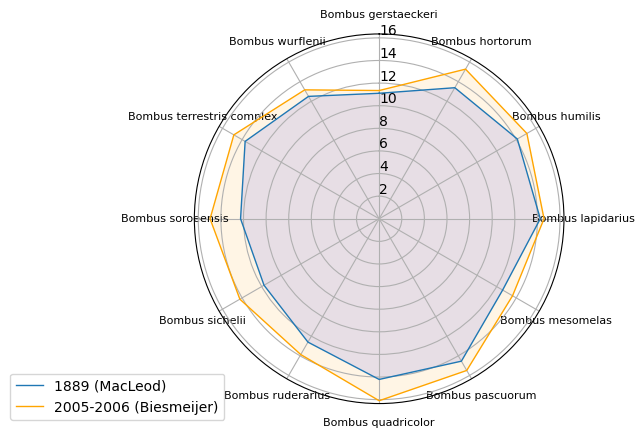

In [75]:
# Import des bibliothèques nécessaires
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt

# Calcul de la température moyenne pour chaque espèce en 1889 et 2005-2006
temp_mean_1889 = bumblebee[bumblebee['Data'] == 'MacLeod'].groupby('Visitor')['clim'].mean()
temp_mean_2005_2006 = bumblebee[bumblebee['Data'] == 'Biesmeijer'].groupby('Visitor')['clim'].mean()
num_species = len(temp_mean_1889)

# Angle de chaque espèce sur le graphique en polar
angles = [n / float(num_species) * 2 * np.pi for n in range(num_species)]
angles += angles[:1]

# Création de la figure et des axes avec un graphique en polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(temp_mean_1889.index, fontsize=8)
ax.set_rlabel_position(0)

# Valeurs de température pour chaque espèce pour les deux années
values_1889 = temp_mean_1889.tolist()
values_1889 += values_1889[:1]
values_2005_2006 = temp_mean_2005_2006.tolist()
values_2005_2006 += values_2005_2006[:1]

# Tracé de la courbe pour chaque année
ax.plot(angles, values_1889, linewidth=1, linestyle='solid', label='1889 (MacLeod)', color='tab:blue')
ax.fill(angles, values_1889, 'b', alpha=0.1)
ax.plot(angles, values_2005_2006, linewidth=1, linestyle='solid', label='2005-2006 (Biesmeijer)', color='orange')
ax.fill(angles, values_2005_2006, 'orange', alpha=0.1)


ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Affichage du graphique
plt.show()


In [76]:
temp_mean_1889 = bumblebee[bumblebee['Data'] == 'MacLeod'].groupby('Visitor')['clim'].mean()
temp_mean_2005_2006 = bumblebee[bumblebee['Data'] == 'Biesmeijer'].groupby('Visitor')['clim'].mean()


In [77]:
temp_diff = temp_mean_2005_2006 - temp_mean_1889
print(temp_diff)

Visitor
Bombus gerstaeckeri          0.242857
Bombus hortorum              1.896337
Bombus humilis               0.976636
Bombus lapidarius            0.331841
Bombus mesomelas             1.010669
Bombus pascuorum             0.947386
Bombus quadricolor           1.883083
Bombus ruderarius            1.271429
Bombus sichelii              2.467308
Bombus soroeensis            2.697658
Bombus terrestris complex    1.152446
Bombus wurflenii             0.666667
Name: clim, dtype: float64


<mark style='background-color: yellow'> - Faites une figure et répondez aux questions suivantes : la température moyenne a-t-elle changé ? </mark> ✅

<span style="color:green">

Le résultat affiché correspond à la différence de température moyenne entre 2011-2015 et 1889 pour chaque espèce de bourdon dans le dataset. La colonne "Visitor" contient le nom de chaque espèce, et la colonne "clim" contient la différence de température moyenne. On peut voir que pour certaines espèces, la différence de température est positive, ce qui indique une augmentation de la température moyenne entre les deux périodes

<mark style='background-color: yellow'> - Les bourdons se sont-ils adaptés à l'augmentation de température dans les Pyrénées ? Si oui, comment  </mark> ✅

<span style="color:green">

On peut dors et deja dir que les bourdons se sont adaptés à l'ogmentation de la temperatur car En général, l'adaptation d'une espèce à un changement climatique peut prendre plusieurs formes d'on celle ci : 

Changement de la répartition géographique: les espèces peuvent se déplacer vers des zones plus fraîches ou plus chaudes pour éviter des températures extrêmes. ici on voit qu'il ont changer d'altitude 
    
    
Changement de la phénologie: les espèces peuvent modifier leur période de reproduction, leur migration ou leur hibernation pour s'adapter aux changements climatiques.
    
    
Changement physiologique: les espèces peuvent modifier leur physiologie pour mieux résister aux températures extrêmes.
    
    
Il est donc possible que les bourdons des Pyrénées aient développé certaines de ces adaptations pour faire face à l'augmentation des températures

###  <mark style='background-color: #B0E0E6'> Changements d'altitude </mark> 



<mark style='background-color: yellow'> - L'altitude moyenne a-t-elle variée en 115 ans ? </mark> ✅

In [78]:
print(bumblebee.columns)

Index(['Longitude', 'Latitude', 'Visitor', 'Plant', 'Date', 'Site', 'Data',
       'MinEle', 'MaxEle', 'EleZone', 'clim'],
      dtype='object')


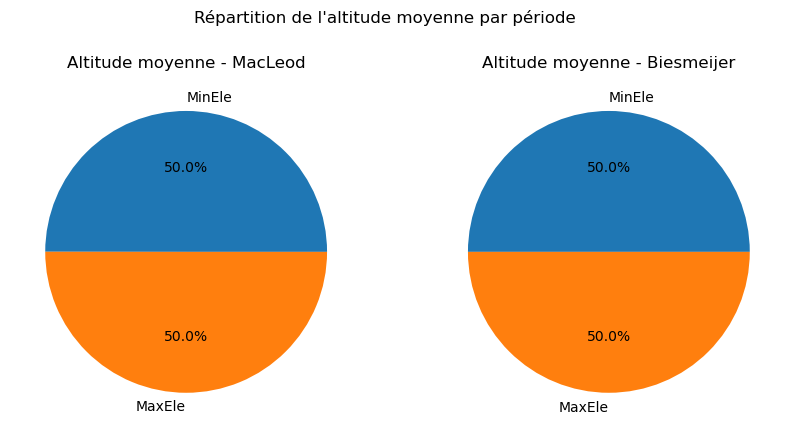

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
bumblebee = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv")

# Séparer les données par période
mac = bumblebee[bumblebee['Data'] == 'MacLeod']
bies = bumblebee[bumblebee['Data'] == 'Biesmeijer']

# Calculer les moyennes pour MinEle et MaxEle
mac_means = mac.groupby('Data')[['MinEle', 'MaxEle']].mean()
bies_means = bies.groupby('Data')[['MinEle', 'MaxEle']].mean()

# Créer un graphique en camembert pour chaque période
labels = ['MinEle', 'MaxEle']
sizes_mac = [mac_means['MinEle'].values[0], mac_means['MaxEle'].values[0]]
sizes_bies = [bies_means['MinEle'].values[0], bies_means['MaxEle'].values[0]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(sizes_mac, labels=labels, autopct='%1.1f%%')
ax1.set_title('Altitude moyenne - MacLeod')

ax2.pie(sizes_bies, labels=labels, autopct='%1.1f%%')
ax2.set_title('Altitude moyenne - Biesmeijer')

fig.suptitle('Répartition de l\'altitude moyenne par période')

plt.show()


<mark style='background-color: yellow'> - On peut aussi s'intéresser aux plantes visitées. Ont-elles changé d'altitude ?</mark> ✅

### <mark style='background-color: #B0E0E6'> Figure 4 : pour aller plus loin</mark> 


Tracez les profils de fréquentation des trois plantes les plus visitées sur les deux périodes. 
Un profil de fréquentation montre la fréquence de visite le long de l'altitude pour chaque période. Cela permet de distinguer l'altitude moyenne à laquelle les bourdons pollinisent et l'altitude maximale, ces deux valeurs pouvant varier à des vitesses différentes au cours du temps.
On peut aussi regarder si ce sont les mêmes espèces qui pollinisent les plantes.

#  <mark style='background-color: #B0E0E6'> Evaluation/Conclusions </mark>

Ce TP a permis d'appréhender les corrélations entre changement de température au cours du temps et modification de la biodiversité en prenant l'exemple des bourdons et de la pollinisation de plantes sauvages. 

Commentez vos résultats en faisant (i) un résumé de vos trouvailles (ii) en lien avec le cours (prenez un peu de recul). Peut-on faire des prédictions ? Quelles expériences pourriez vous proposer par la suite ?